In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
 
from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors,Crippen
 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
 
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

%matplotlib inline

In [3]:
md_para = pd.read_csv('../data/substituted_benzene_para_/substituted_benzene_para_md.csv')
md_mono = pd.read_csv('../data/substituted_benzene_mono_/substituted_benzene_mono_md.csv')
md_orth = pd.read_csv('../data/substituted_benzene_orth_/substituted_benzene_orth_md.csv')
md_meta = pd.read_csv('../data/substituted_benzene_meta_//substituted_benzene_meta_md.csv')
data = pd.concat([md_meta,md_orth,md_para,md_mono],axis=0,join='inner',ignore_index=True)

In [4]:
data = data[data.T[data.dtypes!=np.object].index]

In [5]:
descriptors = data.values

In [6]:
descriptors_std = StandardScaler().fit_transform(descriptors)

In [8]:
pca = PCA()
descriptors_2d = pca.fit_transform(descriptors_std)

In [9]:
descriptors_pca= pd.DataFrame(descriptors_2d)
descriptors_pca.index = data.index
descriptors_pca.columns = ['PC{}'.format(i+1) for i in descriptors_pca.columns]
descriptors_pca.head(30)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC366,PC367,PC368,PC369,PC370,PC371,PC372,PC373,PC374,PC375
0,0.296182,1.585804,-2.723367,-4.464596,5.255574,-7.768809,9.461607,-0.847843,5.593313,-0.883500,...,-0.000189,-0.000173,0.000028,0.000683,0.000533,6.387126e-05,0.000118,-0.000132,-1.312477e-04,1.190622e-15
1,10.159299,-21.938395,11.216946,8.016422,-6.618844,-1.191840,-4.515836,1.683657,8.855161,1.438004,...,-0.000476,0.000565,-0.000354,-0.000015,0.000223,-9.731102e-05,-0.000065,-0.000089,6.784080e-05,1.190622e-15
2,-7.967377,8.931999,4.418339,-7.201471,-6.993375,-6.270384,-1.605708,1.152826,0.701349,-1.576931,...,-0.000086,-0.000190,0.000504,-0.000446,0.000127,5.413838e-05,-0.000311,-0.000129,6.226753e-05,1.190622e-15
3,0.431917,-17.529614,-9.356604,-13.290363,6.767669,1.032234,6.396311,-7.310316,5.633461,-1.463526,...,0.000103,0.000392,-0.000120,0.000060,0.000086,-1.690829e-05,-0.000061,-0.000079,8.541225e-06,1.190622e-15
4,-4.890123,10.996486,1.722693,0.140377,1.930196,10.979207,-6.294326,-0.575359,4.654614,-0.926557,...,0.000256,-0.000245,0.000339,-0.000266,0.000039,9.053340e-05,0.000104,0.000186,1.421511e-05,1.190622e-15
5,-17.038718,11.374782,5.789742,-2.108766,-3.060844,-5.565492,-2.449306,-0.820347,0.694445,-1.678222,...,-0.000335,-0.000600,-0.000265,0.000414,-0.000051,2.060962e-04,0.000551,0.000095,-8.721320e-05,1.190622e-15
6,-9.937462,7.402990,0.170644,-6.601756,2.771164,-5.848029,4.458733,-2.003570,5.687537,-0.349592,...,-0.000590,-0.000073,0.000305,0.000542,0.000189,-3.657675e-05,-0.000188,-0.000154,8.709979e-05,1.190622e-15
7,3.096022,-2.024380,-1.268703,-7.152744,-8.283689,-8.347553,-0.592938,1.034783,1.567722,-5.677598,...,0.000286,-0.000141,-0.000497,0.000508,-0.000812,6.544296e-04,0.000622,-0.000093,3.331557e-04,1.190622e-15
8,41.494116,-10.841948,3.585318,11.184402,-3.715517,0.679395,4.236265,1.992993,-0.849917,5.341167,...,0.000041,-0.000101,0.000641,-0.000120,-0.000131,-1.369746e-04,-0.000116,0.000042,-1.238092e-04,1.190622e-15
9,-10.898993,1.085085,-0.874511,-8.124096,0.109676,-10.426641,3.961474,-4.874306,5.335835,-0.904408,...,0.001145,0.000492,-0.000424,-0.000813,-0.000350,1.116349e-04,0.000175,0.000066,-8.675479e-06,1.190622e-15


In [13]:
print(pca.explained_variance_ratio_) 
print(sum(pca.explained_variance_ratio_[0:20]))

[3.58353629e-01 1.76294552e-01 7.62283572e-02 4.95703230e-02
 3.66557324e-02 3.44891989e-02 3.26504977e-02 2.33149701e-02
 2.07725406e-02 1.81835978e-02 1.76925211e-02 1.55333497e-02
 1.37419462e-02 1.26877041e-02 1.00869063e-02 9.55945525e-03
 8.66545024e-03 7.73992551e-03 5.99899082e-03 5.53413808e-03
 4.97740670e-03 4.38909375e-03 3.93161861e-03 3.43721294e-03
 3.26362201e-03 3.03082750e-03 2.88275736e-03 2.40965888e-03
 2.31614415e-03 2.19410498e-03 1.96064939e-03 1.78557731e-03
 1.57443509e-03 1.56426908e-03 1.41440184e-03 1.33238479e-03
 1.13469637e-03 1.07315337e-03 1.04038346e-03 9.82873382e-04
 9.64488245e-04 9.12842430e-04 8.74642078e-04 8.18367294e-04
 7.39596713e-04 7.02129137e-04 6.71007666e-04 6.53375404e-04
 6.25311181e-04 5.91236450e-04 5.47202809e-04 5.20138553e-04
 5.07604921e-04 4.55801966e-04 4.33404176e-04 4.21222797e-04
 4.08317922e-04 3.68482948e-04 3.55263882e-04 3.40448232e-04
 3.17158008e-04 3.05728003e-04 2.84932941e-04 2.72504417e-04
 2.50914961e-04 2.468624

<Figure size 50x50 with 0 Axes>

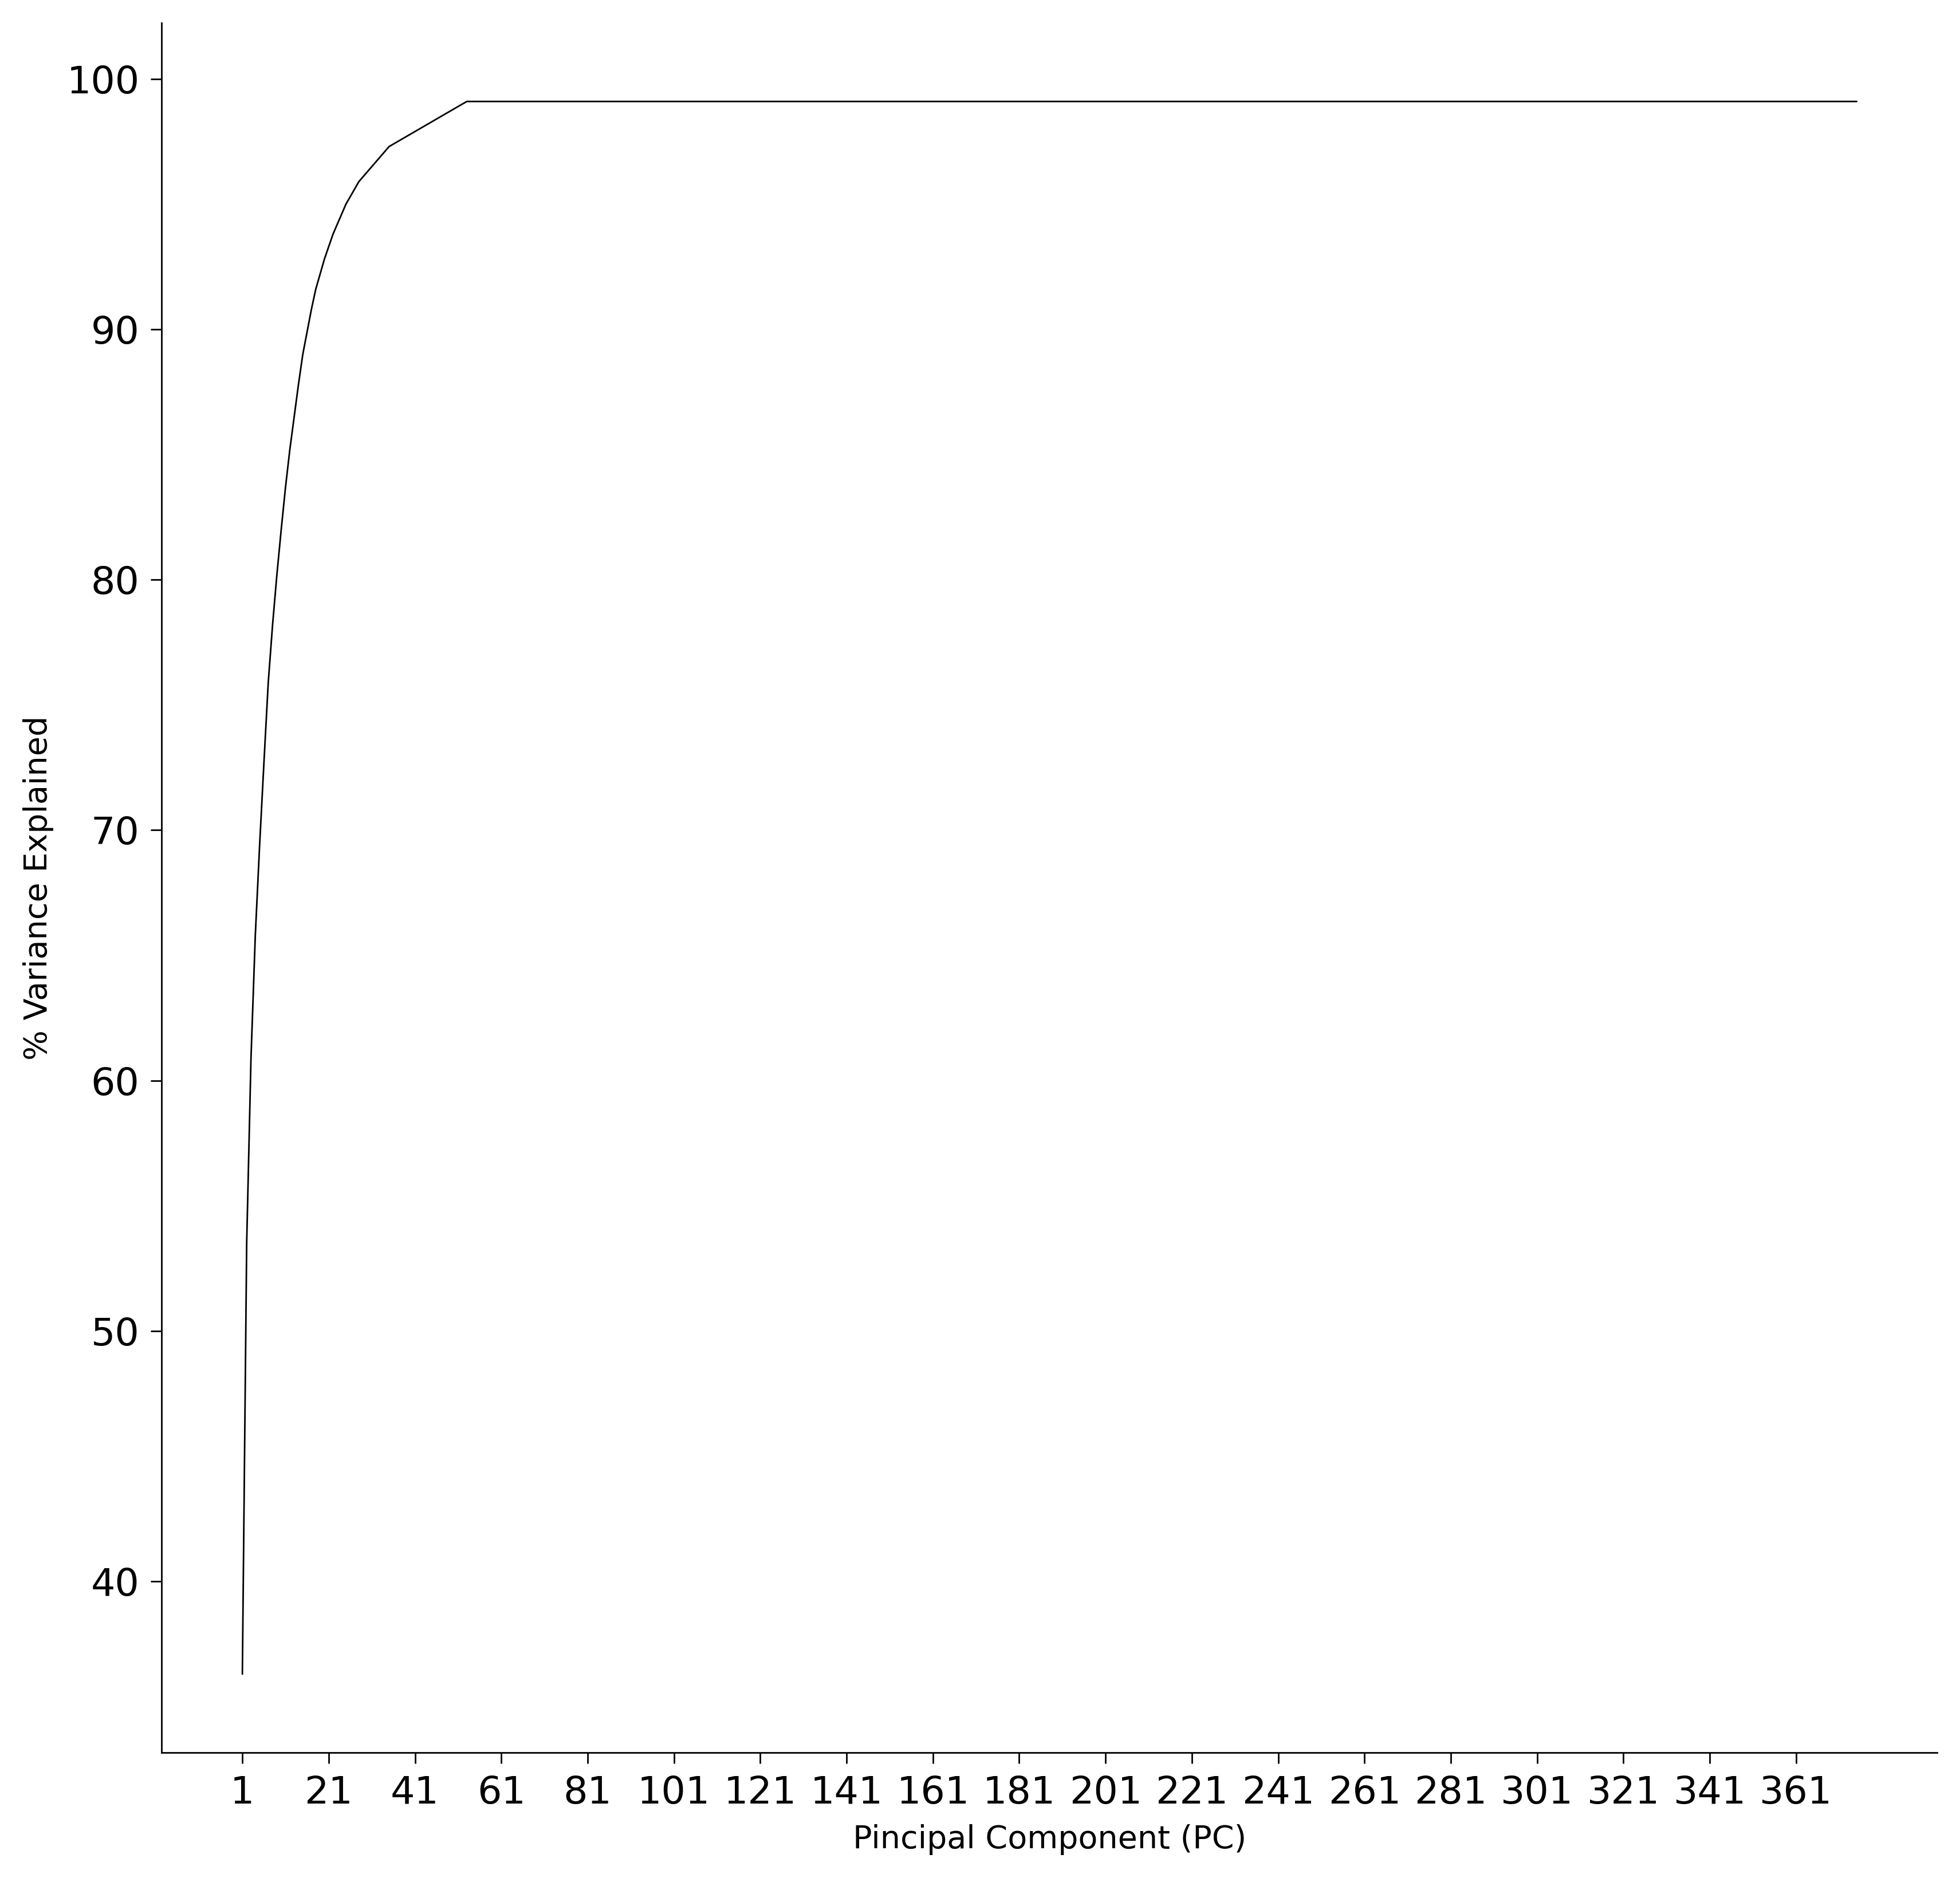

In [16]:
plt.figure(figsize=(5,5),dpi=10)
plt.rcParams['axes.linewidth'] = 0.5
fig, ax = plt.subplots(figsize=(10,10),dpi=400)
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.plot([i+1 for i in range(len(var))],var,'k-',linewidth=0.5)
plt.xticks([i+1 for i in range(len(var))][::20])
plt.ylabel('% Variance Explained')
plt.xlabel('Pincipal Component (PC)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.tight_layout()
plt.tick_params ('both',width=0.5,labelsize=12)
plt.show()

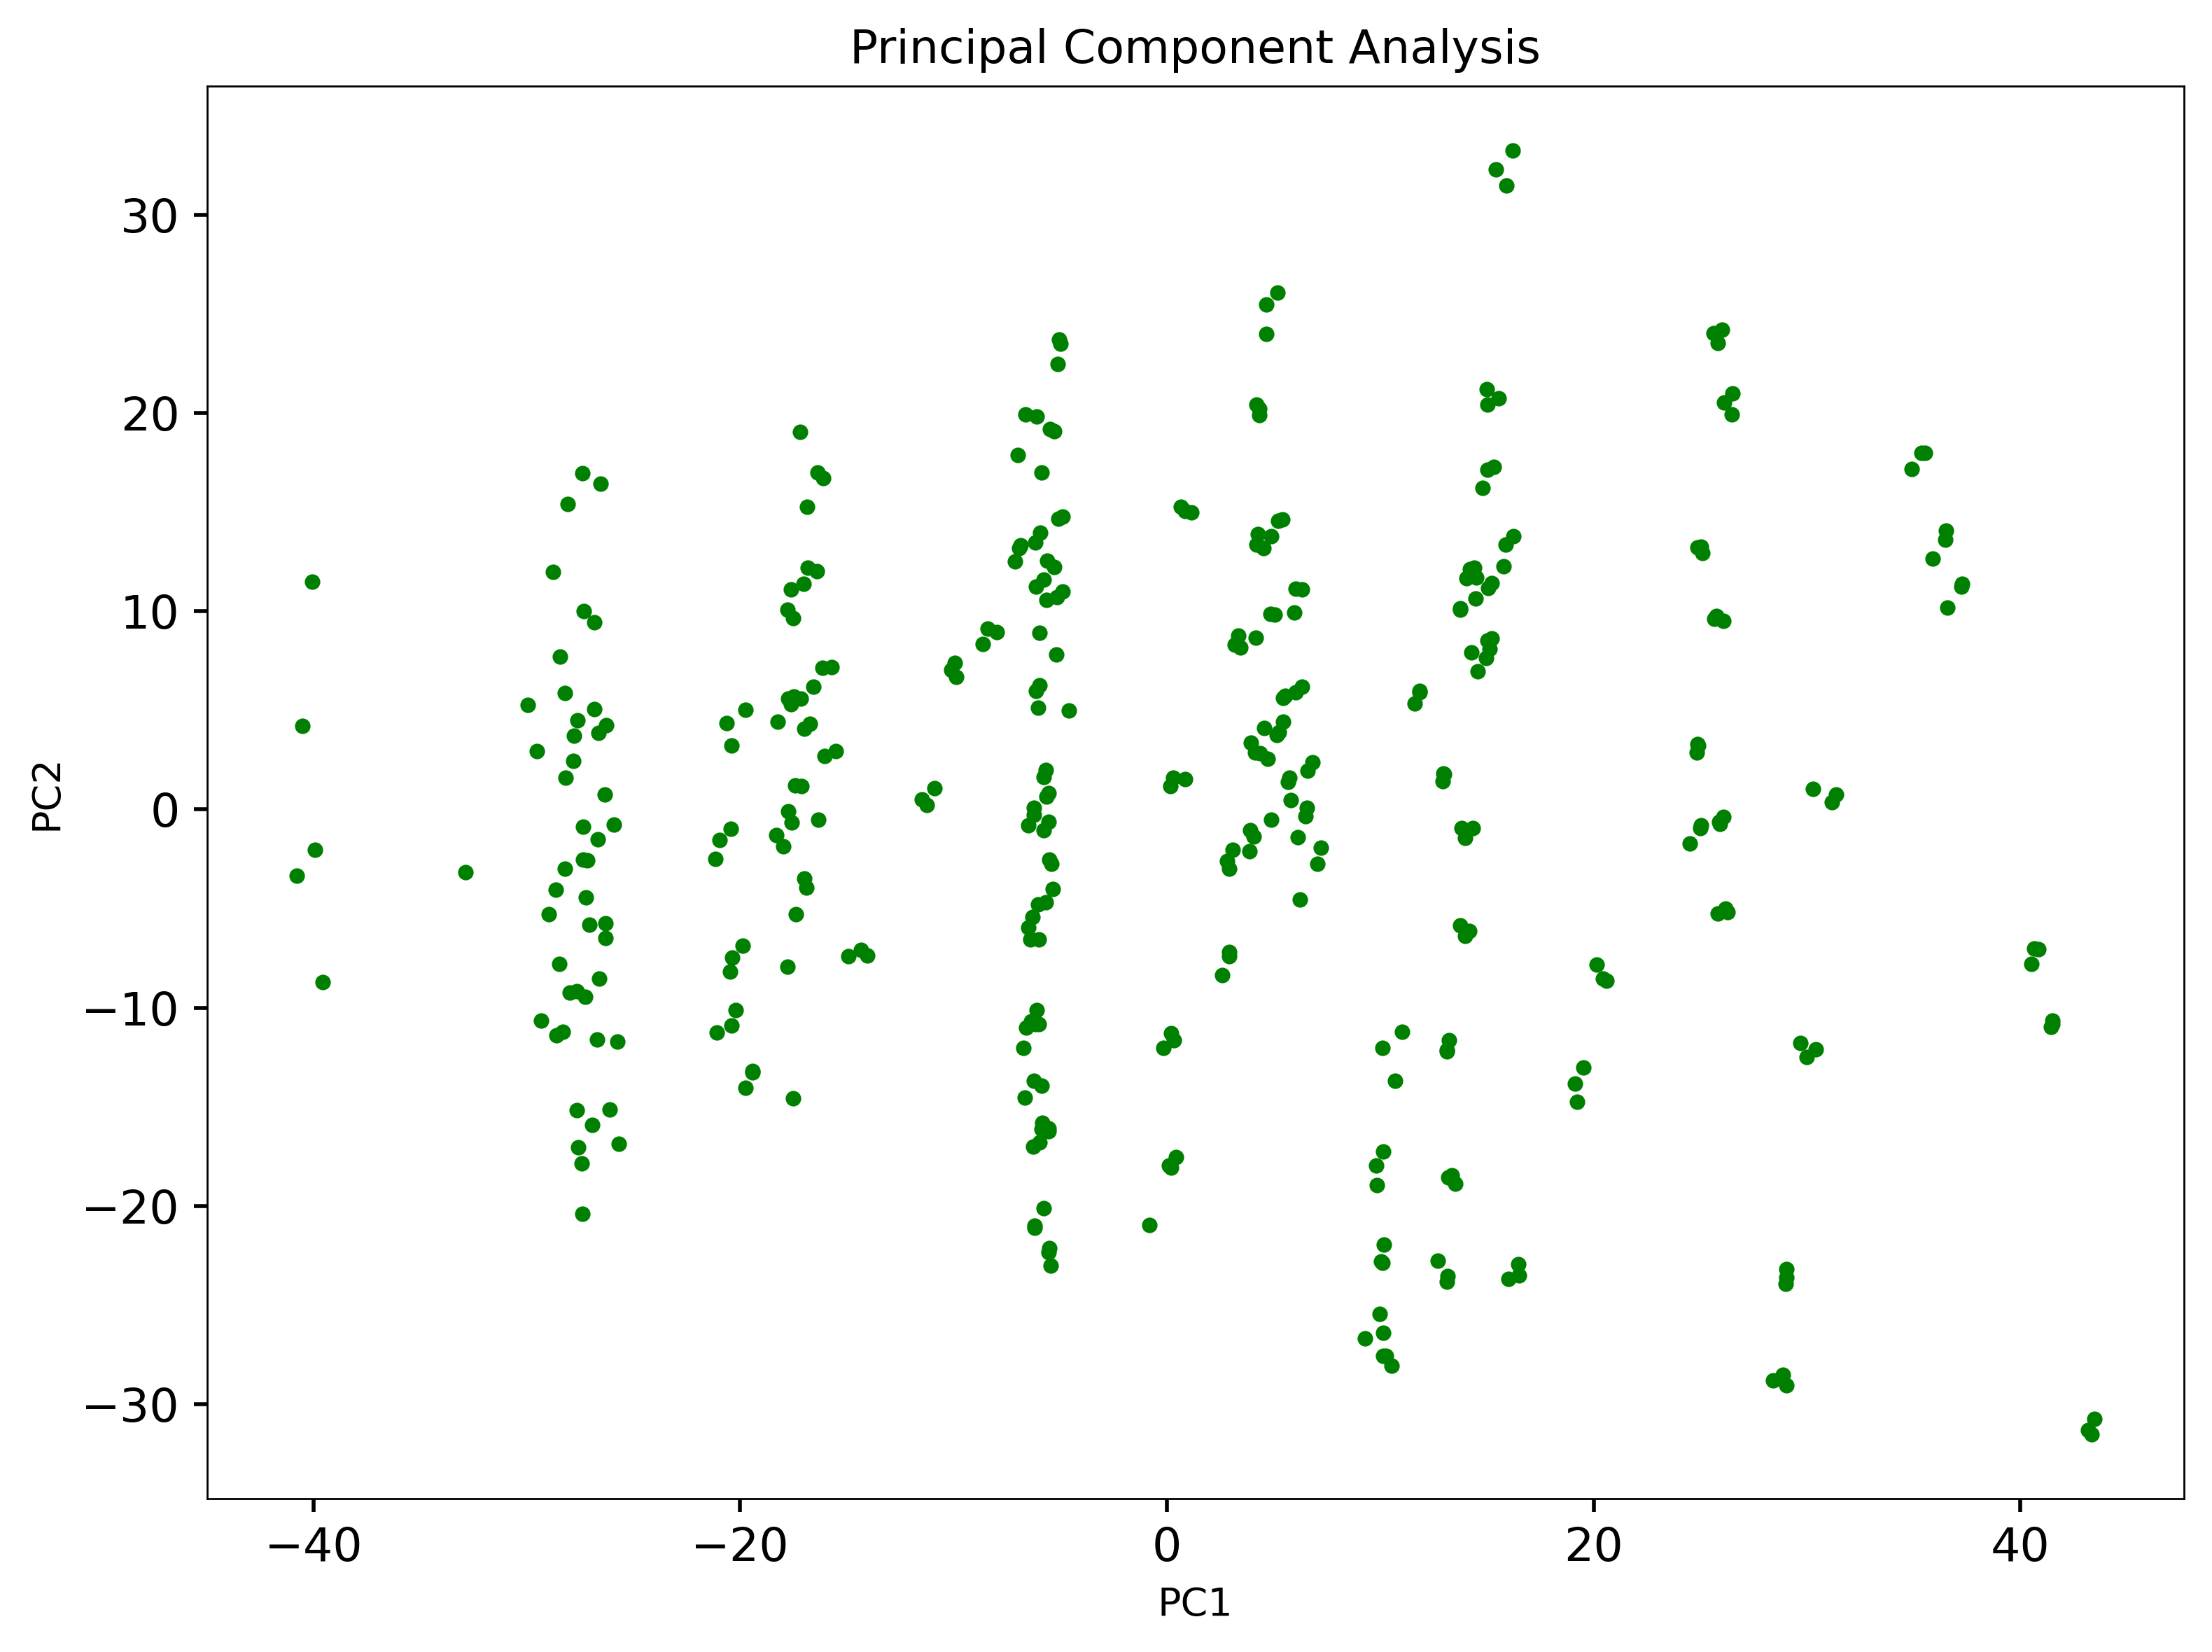

In [17]:

fig = plt.figure(figsize=(8,6),dpi=400)
ax = fig.add_subplot(111)
 
ax.plot(descriptors_pca['PC1'],descriptors_pca['PC2'],'.',color='g')
ax.set_title ('Principal Component Analysis')
ax.set_xlabel ('PC1')
ax.set_ylabel ('PC2')
 
plt.tick_params ('both',width=1,labelsize=12)
 
plt.tight_layout()
plt.savefig('Principal Component Analysis.png',dpi=400)
plt.show()

In [13]:
# This normalization will be performed just for PC1 and PC2, but can be done for all the components.
scale1 = 1.0/(max(descriptors_pca['PC1']) - min(descriptors_pca['PC1']))
scale2 = 1.0/(max(descriptors_pca['PC2']) - min(descriptors_pca['PC2']))
 
# add the new values to our PCA coloum
descriptors_pca['PC1_normalized']=[i*scale1 for i in descriptors_pca['PC1']]
descriptors_pca['PC2_normalized']=[i*scale2 for i in descriptors_pca['PC2']]

For n_clusters = 2 The average silhouette_score is : 0.3760084069236254
For n_clusters = 3 The average silhouette_score is : 0.40063273992598547
For n_clusters = 4 The average silhouette_score is : 0.3599758053497233
For n_clusters = 5 The average silhouette_score is : 0.37561207386719153
For n_clusters = 6 The average silhouette_score is : 0.39505964402040683
For n_clusters = 7 The average silhouette_score is : 0.38052887813484326
For n_clusters = 8 The average silhouette_score is : 0.3925035484354609
For n_clusters = 9 The average silhouette_score is : 0.39713200810555976
For n_clusters = 10 The average silhouette_score is : 0.4093238254127084


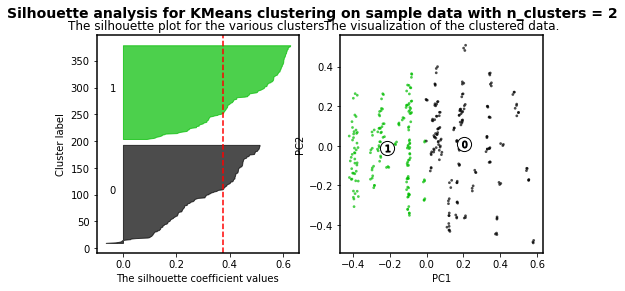

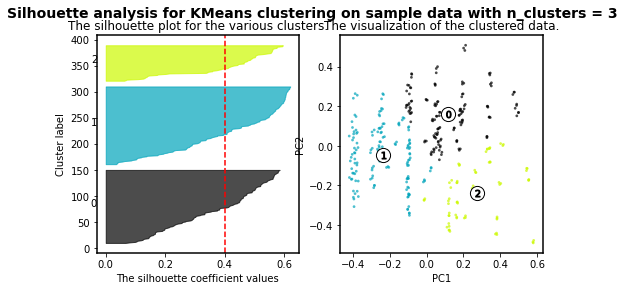

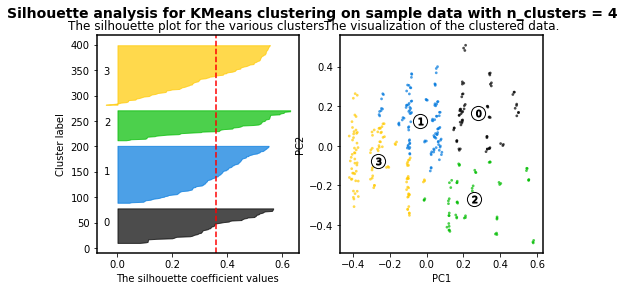

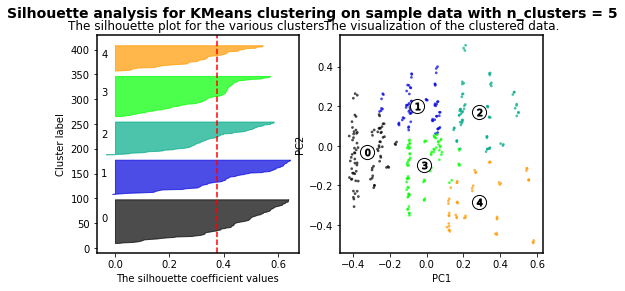

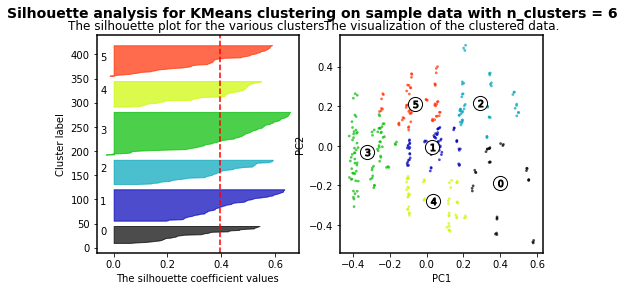

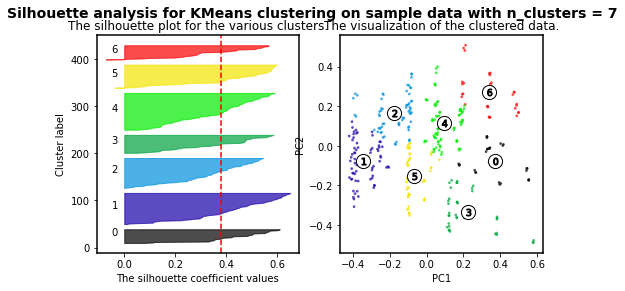

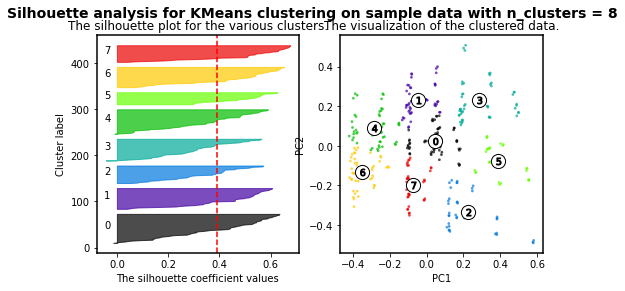

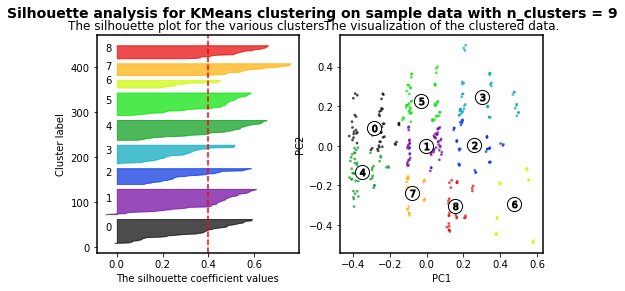

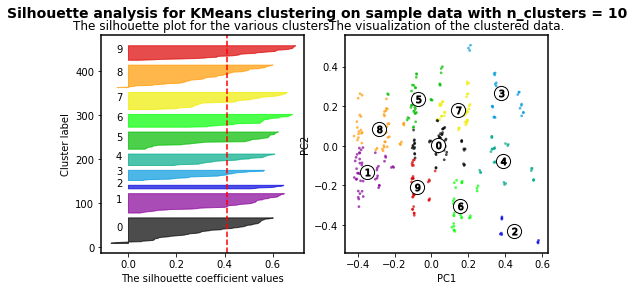

In [14]:
range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10]
for n_clusters in range_n_clusters:
    fig, (ax1,ax2)= plt.subplots(1, 2)
    fig.set_size_inches(8, 4)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(descriptors_pca[['PC1_normalized','PC2_normalized']])
    silhouette_avg = silhouette_score(descriptors_pca[['PC1_normalized','PC2_normalized']], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(descriptors_pca[['PC1_normalized','PC2_normalized']], cluster_labels)
 
    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
 
        ith_cluster_silhouette_values.sort()
 
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
 
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
 
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
 
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
 
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
 
 
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(descriptors_pca['PC1_normalized'], descriptors_pca['PC2_normalized'], 
                marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')
 
 
    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
 
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
 
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")
 
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
 
    
plt.show()